In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import multibind as mb
import numpy as np
import pandas as pd

import torch
import torch.nn as tnn
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cpu


In [14]:
data_r3 = pd.read_csv('../data/countTable.0.CTCF_r3.tsv.gz', sep='\t', header=None) # ['sequence', 'round.0', 'round.1']) #  header=False)
data_r3.columns = ['seq', 0, 1]
data_r3['f0'] = data_r3[0]/sum(data_r3[0])
data_r3['f1'] = data_r3[1]/sum(data_r3[1])
data_r3['affinity'] = data_r3[1]/data_r3[0]
aff = data_r3['affinity']
aff_01 = (aff - np.min(aff)) / (np.max(aff) - np.min(aff))
data_r3['aff_01'] = aff_01
data_r3

,seq,0,1,f0,f1,affinity,aff_01
0,AAAAAAAGCCCGGAAATAGGCAACTTGTAG,0,1,0.000000,0.000019,inf,NaN
1,AAAAAAAGGATGTTCCTAGCAACTTATAAA,1,0,0.000014,0.000000,0.0,0.0
2,AAAAAACAACGATAACCAACTGCTGCCGGA,0,1,0.000000,0.000019,inf,NaN
3,AAAAAACACATGTATGAGTTTTTGATGGAG,1,0,0.000014,0.000000,0.0,0.0
4,AAAAAACCCTCCTTGGTGTCGGACGGCTAT,0,1,0.000000,0.000019,inf,NaN
...,...,...,...,...,...,...,...
120091,TTTTTTTTCTTCATTGTTACAGTAGGTAGC,1,0,0.000014,0.000000,0.0,0.0
120092,TTTTTTTTGACTGCTTGGCTGGCTCCTGTG,1,0,0.000014,0.000000,0.0,0.0
120093,TTTTTTTTGGTCGGATTCGCTGTTGTTCAC,0,1,0.000000,0.000019,inf,NaN
120094,TTTTTTTTTGAACCGGCCGCTCCTATGATC,1,0,0.000014,0.000000,0.0,0.0


In [16]:
data_r3 = pd.read_csv('../data/countTable.0.CTCF_r3.tsv.gz', sep='\t', header=None) # ['sequence', 'round.0', 'round.1']) #  header=False)
data_r3.columns = ['seq', 0, 1]
data_r3[0] += 1
data_r3[1] += 1
data_r3['f0'] = data_r3[0]/sum(data_r3[0])
data_r3['f1'] = data_r3[1]/sum(data_r3[1])
data_r3['affinity'] = data_r3[1]/data_r3[0]
aff = data_r3['affinity']
aff_01 = (aff - np.min(aff)) / (np.max(aff) - np.min(aff))
data_r3['aff_01'] = aff_01
data_r3

,seq,0,1,f0,f1,affinity,aff_01
0,AAAAAAAGCCCGGAAATAGGCAACTTGTAG,1,2,0.000005,0.000012,2.0,0.357143
1,AAAAAAAGGATGTTCCTAGCAACTTATAAA,2,1,0.000010,0.000006,0.5,0.035714
2,AAAAAACAACGATAACCAACTGCTGCCGGA,1,2,0.000005,0.000012,2.0,0.357143
3,AAAAAACACATGTATGAGTTTTTGATGGAG,2,1,0.000010,0.000006,0.5,0.035714
4,AAAAAACCCTCCTTGGTGTCGGACGGCTAT,1,2,0.000005,0.000012,2.0,0.357143
...,...,...,...,...,...,...,...
120091,TTTTTTTTCTTCATTGTTACAGTAGGTAGC,2,1,0.000010,0.000006,0.5,0.035714
120092,TTTTTTTTGACTGCTTGGCTGGCTCCTGTG,2,1,0.000010,0.000006,0.5,0.035714
120093,TTTTTTTTGGTCGGATTCGCTGTTGTTCAC,1,2,0.000005,0.000012,2.0,0.357143
120094,TTTTTTTTTGAACCGGCCGCTCCTATGATC,2,1,0.000010,0.000006,0.5,0.035714


In [11]:
def get_norm01(self, x):
        return [(xi - min(x)) / (max(x) - min(x)) for xi in x]

----

In [3]:
data_r3 = pd.read_csv('../data/countTable.0.CTCF_r3.tsv.gz', sep='\t', header=None) # ['sequence', 'round.0', 'round.1']) #  header=False)
data_r3.columns = ['seq', 0, 1]
data_r3

,seq,0,1
0,AAAAAAAGCCCGGAAATAGGCAACTTGTAG,0,1
1,AAAAAAAGGATGTTCCTAGCAACTTATAAA,1,0
2,AAAAAACAACGATAACCAACTGCTGCCGGA,0,1
3,AAAAAACACATGTATGAGTTTTTGATGGAG,1,0
4,AAAAAACCCTCCTTGGTGTCGGACGGCTAT,0,1
...,...,...,...
120091,TTTTTTTTCTTCATTGTTACAGTAGGTAGC,1,0
120092,TTTTTTTTGACTGCTTGGCTGGCTCCTGTG,1,0
120093,TTTTTTTTGGTCGGATTCGCTGTTGTTCAC,0,1
120094,TTTTTTTTTGAACCGGCCGCTCCTATGATC,1,0


In [5]:
data_r3[[0, 1]].describe()

,0,1
count,120096.000000,120096.000000
mean,0.601927,0.430381
std,0.489894,0.560016
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,2.000000,4.000000


In [76]:
print(0.489894**2, 0.560016**2)
print(sum(data_r3[0]), sum(data_r3[1]))

0.239996131236 0.31361792025599994
72289 51687


In [73]:
data_r3[(data_r3[1] > 0) & (data_r3[0] > 0)]

,seq,0,1


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

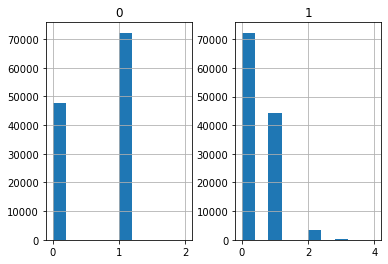

In [77]:
data_r3.hist()

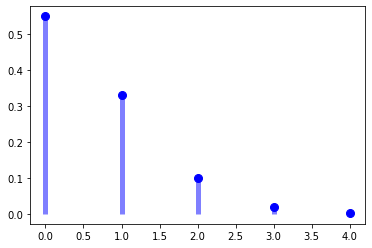

In [92]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mu = 0.60
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.0001, mu), poisson.ppf(0.9999, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

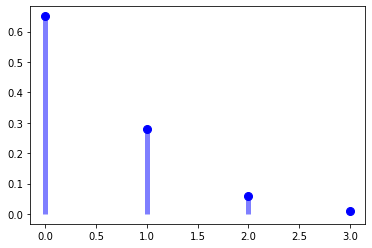

In [91]:
fig, ax = plt.subplots(1, 1)
mu = 0.43
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.0001, mu), poisson.ppf(0.9999, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

In [69]:
from scipy.stats import chi2
import numpy as np
x = np.array(data_r3[0])
res = 1 - 2 * np.abs((1 - chi2.cdf(np.sum((x - np.mean(x))**2)/np.mean(x), len(x) - 1))-0.5)
print("Probability of being drawn from Poisson distribution: ", res)

Probability of being drawn from Poisson distribution:  0.0


In [68]:
from scipy.stats import chi2
import numpy as np
x = np.array(data_r3[1])
res = 1 - 2 * np.abs((1 - chi2.cdf(np.sum((x - np.mean(x))**2)/np.mean(x), len(x) - 1))-0.5)
print("Probability of being drawn from Poisson distribution: ", res)

Probability of being drawn from Poisson distribution:  0.0


In [59]:
np.sum((x-np.mean(x))**2/np.mean(x))

87513.01671600211

In [60]:
chi2.cdf(87513, 100000)

1.998375022797456e-187

In [74]:
data_r3.corr()

,0,1
0,1.000000,-0.944274
1,-0.944274,1.000000


In [80]:
data_r3[['seq']].to_csv('../../ctcf_r3_seq.txt', header=False, index=False)

As a next step, I generated with ProBoundTools outside of this notebook the two files `ctcf_r3_bmout.txt.gz` and `ctcf_r3_finalpred.txt.gz`. They are in the data directory. The configurations of ProBoundTools were:

`ctcf_r3_bmout.txt.gz`: `-c loadFitLine(fit.final.json).buildConsensusModel().addNScoring().inputTXT(ctcf_r3_seq.txt).bindingModeScores(ctcf_r3_bmout.txt.gz)`

`ctcf_r3_finalpred.txt.gz`: `-c loadFitLine(fit.final.json).buildConsensusModel().addNScoring().inputTXT(ctcf_r3_seq.txt).affinitySum(ctcf_r3_finalpred.txt.gz)`

Then I compressed both files with `gzip`.

In [87]:
model_pred = pd.read_csv('../data/ctcf_r3_bmout.txt.gz', header=None, sep='\t')
model_pred.columns = ['seq', 'b0', 'b1', 'b2']
model_pred

,seq,b0,b1,b2
0,AAAAAAAGCCCGGAAATAGGCAACTTGTAG,38.0,1.488940e-05,2.57704
1,AAAAAAAGGATGTTCCTAGCAACTTATAAA,38.0,1.118780e-06,2.70808
2,AAAAAACAACGATAACCAACTGCTGCCGGA,38.0,1.175710e-04,2.76611
3,AAAAAACACATGTATGAGTTTTTGATGGAG,38.0,6.983530e-06,2.86240
4,AAAAAACCCTCCTTGGTGTCGGACGGCTAT,38.0,1.544360e-04,2.08129
...,...,...,...,...
120091,TTTTTTTTCTTCATTGTTACAGTAGGTAGC,38.0,1.028570e-06,3.38612
120092,TTTTTTTTGACTGCTTGGCTGGCTCCTGTG,38.0,6.149050e-06,2.49118
120093,TTTTTTTTGGTCGGATTCGCTGTTGTTCAC,38.0,1.503120e-06,2.72103
120094,TTTTTTTTTGAACCGGCCGCTCCTATGATC,38.0,1.343340e-05,2.82199


In [98]:
model_final = pd.read_csv('../data/ctcf_r3_finalpred.txt.gz', header=None, sep='\t')
model_final.columns = ['seq', 'pred']
model_final

,seq,pred
0,AAAAAAAGCCCGGAAATAGGCAACTTGTAG,0.000505
1,AAAAAAAGGATGTTCCTAGCAACTTATAAA,0.000516
2,AAAAAACAACGATAACCAACTGCTGCCGGA,0.000643
3,AAAAAACACATGTATGAGTTTTTGATGGAG,0.000551
4,AAAAAACCCTCCTTGGTGTCGGACGGCTAT,0.000551
...,...,...
120091,TTTTTTTTCTTCATTGTTACAGTAGGTAGC,0.000643
120092,TTTTTTTTGACTGCTTGGCTGGCTCCTGTG,0.000480
120093,TTTTTTTTGGTCGGATTCGCTGTTGTTCAC,0.000518
120094,TTTTTTTTTGAACCGGCCGCTCCTATGATC,0.000549


In [100]:
result = data_r3.merge(model_pred, on='seq')
result = result.merge(model_final, on='seq')
result.sort_values('pred', ascending=False)

,seq,0,1,b0,b1,b2,pred
79574,GTGGTGATTCGCCCGGCCGCTAGGGGGCGA,0,1,38.0,0.842178,2.40520,0.842636
102036,TGCACTTATCTGCCGCTAGGGGGCGTTGAT,0,1,38.0,0.840760,2.33872,0.841205
62849,GCTGCCGCTAGGGGGCGACCTTTCCCTCAT,0,2,38.0,0.840774,2.22139,0.841197
40095,CGCCGCTAGGGGGCGTATTCTTGCTTAGGA,0,1,38.0,0.840564,2.41298,0.841023
94424,TCATTTCAGTACCACTAGGGGGCGCGTTCC,0,1,38.0,0.808475,2.95527,0.809036
...,...,...,...,...,...,...,...
41623,CGGGGCAGGGTGTGCCCGGCGCGGAGCTCC,0,1,38.0,0.000035,1.74421,0.000368
43177,CGTGAGTCCGTCCTGGACCCGGGCCGTGCA,1,0,38.0,0.000034,1.74772,0.000367
30078,CAATCGTGCGGGGTACGGGAGCCCTCTGCC,0,1,38.0,0.000017,1.82511,0.000365
88808,TAGGGGGCGGGCCCGGACCTAGTTCGTGTG,0,2,38.0,0.000015,1.83299,0.000364


In [110]:
result[result[1] >= 2].sort_values('pred', ascending=False)

,seq,0,1,b0,b1,b2,pred
62849,GCTGCCGCTAGGGGGCGACCTTTCCCTCAT,0,2,38.0,0.840774,2.22139,0.841197
40088,CGCCGCCAGGGGGCGCACTAGGTAGTGGGT,0,3,38.0,0.378973,1.96457,0.379347
69743,GGGGTGCAAGCCAGACCACTAGGTGGCGTG,0,2,38.0,0.318506,2.19691,0.318924
30549,CACCAGTAGGGGGCGGCACCTCTACCAATT,0,2,38.0,0.305639,2.39797,0.306095
101291,TGATAGAGATTGCCAGTAGGGGGCGTCCTC,0,3,38.0,0.256840,2.42201,0.257300
...,...,...,...,...,...,...,...
9601,ACGATACGGGGTTAGCTGGGTACCCTAGGG,0,2,38.0,0.000008,2.08840,0.000405
68690,GGGCGGAGAGGGATGCCGGGCGGTCTCTAG,0,2,38.0,0.000044,1.86378,0.000400
116559,TTGTGCGTAGCGCGCGTTGCCCGCTAGGGC,0,2,38.0,0.000038,1.88500,0.000397
65234,GGAGTGGGGAGCGGGGAGCCTGCTCGCGAA,0,2,38.0,0.000054,1.76981,0.000391


In [101]:
result.corr()

,0,1,b0,b1,b2,pred
0,1.000000,-0.944274,NaN,-0.102879,0.034619,-0.102742
1,-0.944274,1.000000,NaN,0.100718,-0.030620,0.100602
b0,NaN,NaN,NaN,NaN,NaN,NaN
b1,-0.102879,0.100718,NaN,1.000000,-0.096177,0.999985
b2,0.034619,-0.030620,NaN,-0.096177,1.000000,-0.090765
pred,-0.102742,0.100602,NaN,0.999985,-0.090765,1.000000


In [103]:
result[result[0] > 0][['b0', 'b1', 'b2', 'pred']].describe()

,b0,b1,b2,pred
count,72266.0,7.226600e+04,72266.000000,72266.000000
mean,38.0,1.241148e-04,2.682185,0.000634
std,0.0,1.058873e-03,0.351431,0.001054
min,38.0,5.579600e-08,1.610000,0.000359
25%,38.0,5.571628e-06,2.434635,0.000507
50%,38.0,1.717925e-05,2.664570,0.000550
75%,38.0,5.830020e-05,2.908045,0.000603
max,38.0,1.329070e-01,4.330100,0.133316


In [104]:
result[result[1] > 0][['b0', 'b1', 'b2', 'pred']].describe()

,b0,b1,b2,pred
count,47830.0,4.783000e+04,47830.000000,47830.000000
mean,38.0,2.712756e-03,2.656891,0.003218
std,0.0,1.936395e-02,0.363226,0.019355
min,38.0,6.205380e-08,1.486090,0.000364
25%,38.0,6.734770e-06,2.398180,0.000514
50%,38.0,2.342475e-05,2.637545,0.000563
75%,38.0,1.098318e-04,2.894650,0.000643
max,38.0,8.421780e-01,4.813470,0.842636


In [28]:
import random
from scipy.stats import poisson
sim_seqs = set()
while len(sim_seqs) < 120096:
    sim_seqs.add(''.join(random.choice('ACGT') for _ in range(30)))
r0 = poisson.rvs(0.6, size=120096)
r1 = poisson.rvs(0.43, size=120096)
sim = pd.DataFrame({'seq': list(sim_seqs), 0: r0, 1: r1})
sim

,seq,0,1
0,GTGCAGTGCGTTATAGGCCCATGTACTGTG,1,1
1,AATGGGATAGAGGCAACCGCCCACGTATCT,0,1
2,CCACGGGTAGCTGGTGGGTCGGCATTTCCC,1,0
3,AGATCTCTCCGATAAATCGAATAAGCGCGT,0,0
4,TGTACTAGTCCCTGTGAGTTCGCTAAGACC,1,0
...,...,...,...
120091,GGCAATCGTACCCCGGGCTCCACGTTTGAT,2,0
120092,CAAATTCGCTATTCTCTCATCAGTACCGAG,0,1
120093,TCGATTTAACGCTGACGGGACCTGAGCAAA,2,0
120094,TGGAGCTTCGGCAGCGAGCTTCACGTTATC,1,0


In [29]:
sim[(sim[0] == 0) & (sim[1] == 0)]

,seq,0,1
3,AGATCTCTCCGATAAATCGAATAAGCGCGT,0,0
5,GGGTGCGAGTCTTCAGCAGCTGGAATCTAA,0,0
6,ACCGGATTAGGCTAGGTACCTGGTGGTGAG,0,0
8,AAGACGCTCTCTACGGAGCCCTTTAGACTA,0,0
9,TTTCCCGGCTACAGATCGGTCGCTGCAATC,0,0
...,...,...,...
120071,CTGCACGACTAAAGTATTACCTGTCAGTTA,0,0
120072,CCTGGTCATTCTCGATCGTGCGTCTGTCTA,0,0
120075,GGAACACAAGCCCCTTATTTAAAAACCGTA,0,0
120082,TTATAGGCTCACTGGTTCTATGTGCTCTAT,0,0


In [30]:
sim[[0, 1]].describe()

,0,1
count,120096.000000,120096.000000
mean,0.594524,0.429290
std,0.770144,0.655659
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,6.000000,5.000000


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

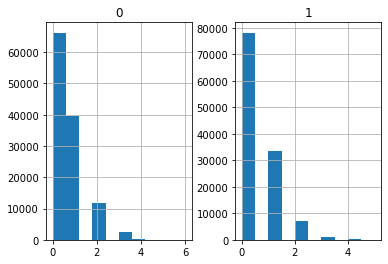

In [31]:
sim.hist()

In [34]:
from scipy.stats import chi2
import numpy as np
# x = np.array(sim[1])
x = np.array(sim[1])
res = 1 - 2 * np.abs((1 - chi2.cdf(np.sum((x - np.mean(x))**2)/np.mean(x), len(x) - 1))-0.5)
print("Probability of being drawn from Poisson distribution: ", res)

Probability of being drawn from Poisson distribution:  0.7314283844650051


In [21]:
sum(data_r3[0])/(4**30)

6.27007126774437e-14

In [61]:
data_esaj = pd.read_csv('../data/countTable.0.CTCF_ESAJ_TAGCGA20NGCT.tsv.gz', sep='\t', header=None) # ['sequence', 'round.0', 'round.1']) #  header=False)
data_esaj.columns = ['seq', 0, 1, 2, 3, 4]
data_esaj

,seq,0,1,2,3,4
0,AAAAAAAAAACCTCAAGAAG,1,0,0,0,0
1,AAAAAAAAAGCCGTTGTCGC,0,0,1,0,0
2,AAAAAAAAAGGATTTGAATT,0,0,0,0,1
3,AAAAAAAAAGTCAAAATGTC,0,1,0,0,0
4,AAAAAAAAATAGGGACCTAC,1,0,0,0,0
...,...,...,...,...,...,...
438648,TTTTTTTACATTTCTCGCCA,1,0,0,0,0
438649,TTTTTTTCCAATGCAAACGT,1,0,0,0,0
438650,TTTTTTTCCGAAAGATGTAA,0,1,0,0,0
438651,TTTTTTTCGAGTGATGGTAT,1,0,0,0,0


In [66]:
from scipy.stats import chi2
import numpy as np
x = np.array(data_esaj[4])
res = 1 - 2 * np.abs((1 - chi2.cdf(np.sum((x - np.mean(x))**2)/np.mean(x), len(x) - 1))-0.5)
res

0.0

In [9]:
data_esaj[[0, 1, 2, 3, 4]].describe()

,0,1,2,3,4
count,438653.000000,438653.000000,438653.000000,438653.000000,438653.000000
mean,0.216182,0.227971,0.227971,0.227971,0.227971
std,0.413155,0.420360,0.422535,0.471933,0.861049
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,3.000000,3.000000,13.000000,61.000000


In [47]:
data_esaj[data_esaj[4] > 40]

,seq,0,1,2,3,4
64696,ACGTACTACCACTAGGTGGC,0,0,0,13,45
142753,CACAGCGCCACCTAGCGGTA,0,0,0,11,44
156642,CACGATGTCCACTAGGTGGC,0,0,1,5,48
165384,CAGCGCCCTCTAGCGGTAAC,0,0,0,4,49
223087,CGAATCGTCCACTAGGTGGC,0,0,0,7,61
228033,CGATCCTACCACTAGGTGGC,0,0,1,11,55
341375,GTGCGCCCTCTAGTGGTTGC,0,0,0,5,49
361830,TACGCCTACCGCTAGGTGGC,0,0,0,3,41
418430,TGTCCCGTCCGCTAGGGGGC,0,0,1,6,44


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

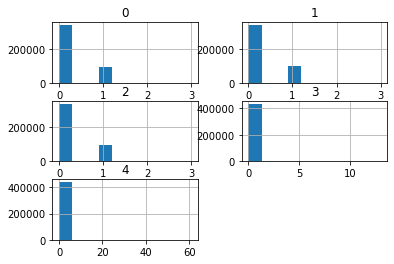

In [70]:
data_esaj.hist()

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

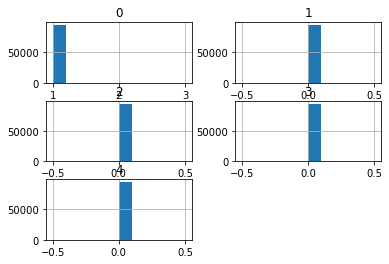

In [72]:
data_esaj[data_esaj[0] > 0].hist()

In [38]:
data_esaj[data_esaj[0] > 0][0].describe()

count    94565.000000
mean         1.002792
std          0.054731
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: 0, dtype: float64

In [56]:
print(len(data_esaj[(data_esaj[2] > 0) & (data_esaj[3] == 0) & ((data_esaj[0] > 0) | (data_esaj[1] > 0))])/2)
print(len(data_esaj[(data_esaj[3] > 0) & (data_esaj[4] == 0) & ((data_esaj[0] > 0) | (data_esaj[1] > 0) | (data_esaj[2] > 0))])/3)
print(len(data_esaj[(data_esaj[4] > 0) & ((data_esaj[0] > 0) | (data_esaj[1] > 0) | (data_esaj[2] > 0) | (data_esaj[3] > 0))])/4)

65.5
308.6666666666667
3152.25


In [57]:
data_esaj[(data_esaj[0] != 0) & ((data_esaj[1] != 0) | (data_esaj[2] != 0) | (data_esaj[3] != 0) | (data_esaj[4] != 0))]

,seq,0,1,2,3,4


In [73]:
data_esaj.corr()

,0,1,2,3,4
0,1.000000,-0.283769,-0.282309,-0.252759,-0.138535
1,-0.283769,1.000000,-0.290855,-0.260502,-0.141935
2,-0.282309,-0.290855,1.000000,-0.236411,-0.111422
3,-0.252759,-0.260502,-0.236411,1.000000,0.226609
4,-0.138535,-0.141935,-0.111422,0.226609,1.000000


In [62]:
data_esaj[data_esaj[4] != 0]

,seq,0,1,2,3,4
2,AAAAAAAAAGGATTTGAATT,0,0,0,0,1
11,AAAAAAAACGAGCGCGGCAA,0,0,0,0,1
12,AAAAAAAACTGAAGCGTGAG,0,0,0,0,1
13,AAAAAAAAGAGAAAGAGGAA,0,0,0,0,1
16,AAAAAAAAGCCCTCACGAAC,0,0,0,0,1
...,...,...,...,...,...,...
438599,TTTTTCTGCCAGTAGAGGGC,0,0,0,0,1
438607,TTTTTGATATCGCGCAGGAG,0,0,0,0,1
438630,TTTTTGTCTCTTACAAAAAC,0,0,0,0,1
438637,TTTTTTCCGCCAGCTCCGAT,0,0,0,0,2


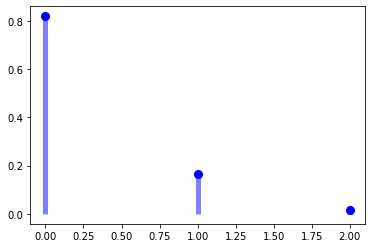

In [88]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mu = 0.2
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.0001, mu), poisson.ppf(0.9999, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)